In [325]:
#Data_set_link = 'https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset'

In [326]:
#importing Libraries
import numpy as np 
import pandas as pd
import sklearn


In [327]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [328]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [329]:
df.shape

(5572, 5)

In [330]:
#1. data cleaning
#2. EDA
#3. Text preprocessing
#4. model building 
#5. Evaluation
#6. Improvement

In [331]:
#1. DATA CLEANING

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [333]:
#drop last 3 columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [334]:
df.sample(5)

,v1,v2
2336,ham,\Aww you must be nearly dead!Well Jez isComing...
4314,ham,Captain is in our room:)
3793,ham,Short But Cute: \Be a good person
2942,ham,No message..no responce..what happend?
5123,ham,"Hi Chikku, send some nice msgs"


In [335]:
# renaming the columns
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
1522,ham,I thk u dun haf 2 hint in e forum already lor....
3190,spam,UR awarded a City Break and could WIN a å£200 ...
3787,spam,Want to funk up ur fone with a weekly new tone...
2928,ham,Where wuld I be without my baby? The thought a...
19,spam,England v Macedonia - dont miss the goals/team...


In [336]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [337]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [338]:
# missing values
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       target   text
0      False  False
1      False  False
2      False  False
3      False  False
4      False  False
...      ...    ...
5567   False  False
5568   False  False
5569   False  False
5570   False  False
5571   False  False

[5572 rows x 2 columns]>

In [339]:
# check for duplicates
df.duplicated().sum()

403

In [340]:
df = df.drop_duplicates(keep = 'first')

In [341]:
df.duplicated().sum()

0

In [342]:
df.shape

(5169, 2)

In [343]:
# 2.EDA

In [344]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1e80e595290>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

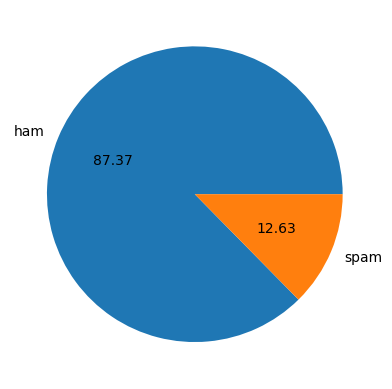

In [345]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct = "%0.2f")


In [346]:
#data is imbalanced

In [347]:
import nltk

In [348]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [349]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [350]:
df['num_characters'] = df['text'].apply(len)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6300\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [351]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [352]:
# num of words
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6300\2898093676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [353]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [354]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6300\4255846006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [355]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [356]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [357]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [358]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [359]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

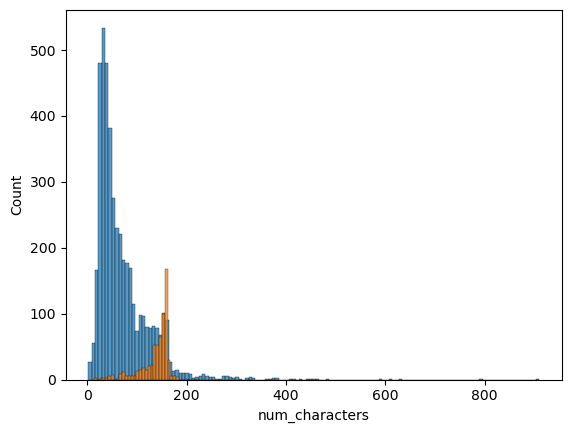

In [360]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])



<Axes: xlabel='num_words', ylabel='Count'>

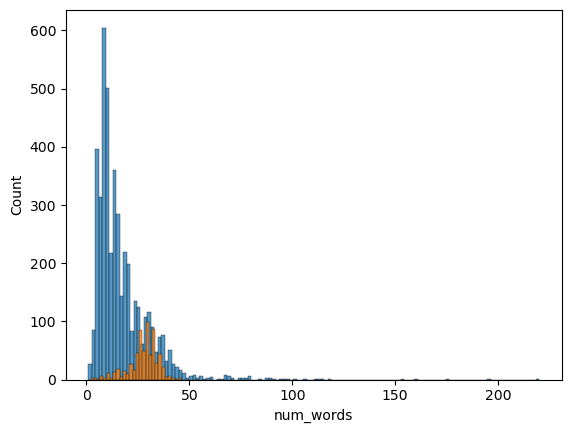

In [361]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])


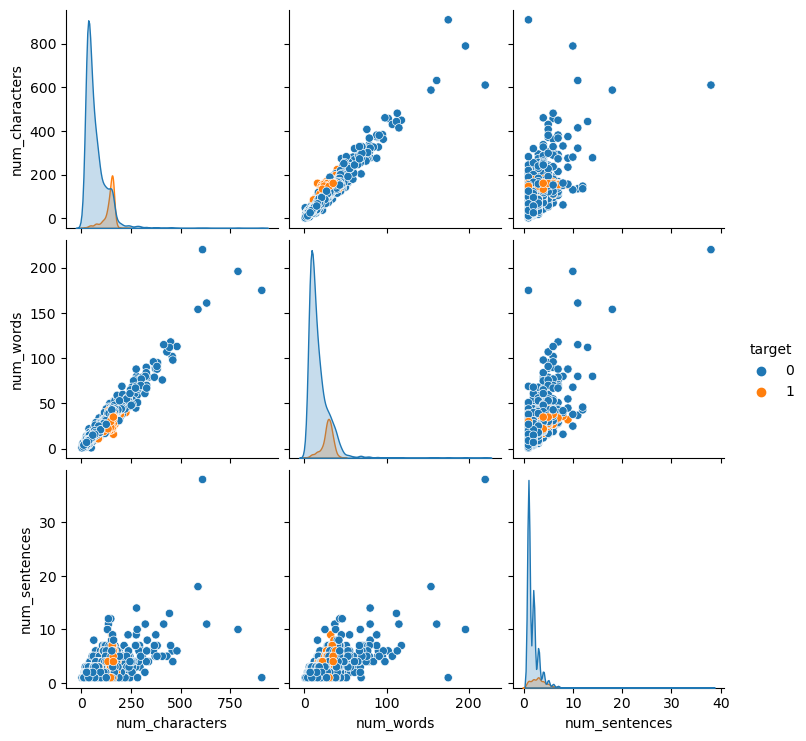

In [362]:
sns.pairplot(df,hue='target')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6300\1305659618.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot= True)


<Axes: >

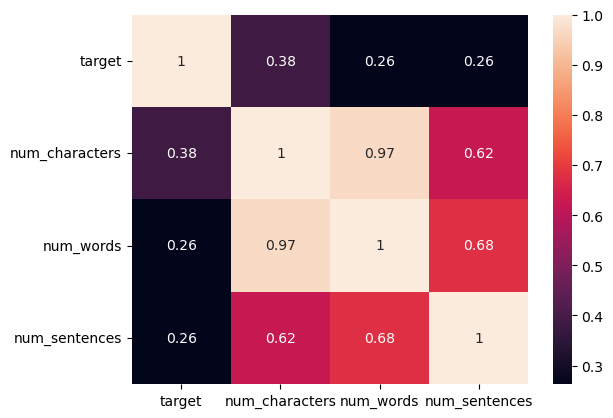

In [363]:
sns.heatmap(df.corr(),annot= True)

In [364]:
# Text Preprocessing
#1.lower case
#2.Tokenization
#3.Removing special characters
#4.Removing stop words and punctuation
#5.Stemming

In [365]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]

    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return" ".join(y)

In [366]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [367]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [368]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [369]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')


'danc'

In [370]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [371]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [372]:
df['transform_text']= df['text'].apply(transform_text)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6300\814766640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text']= df['text'].apply(transform_text)


In [373]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [374]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [375]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 , min_font_size = 10 ,background_color='white')

In [376]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

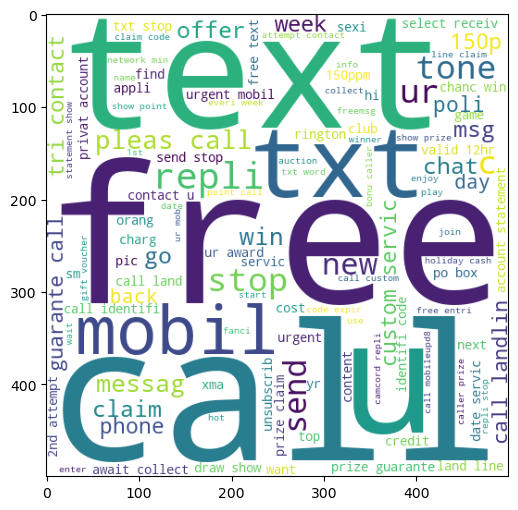

In [377]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [378]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

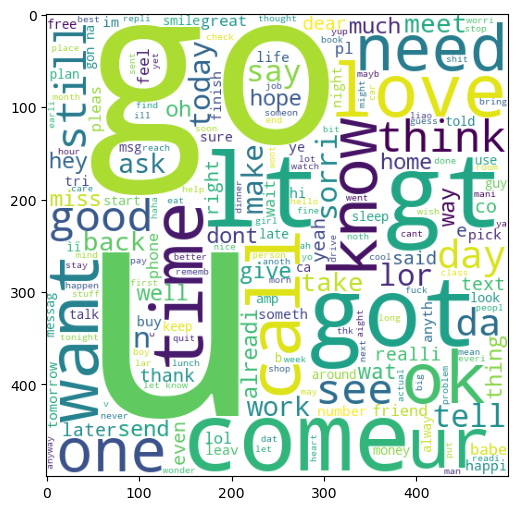

In [379]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [380]:
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [381]:
len(spam_corpus)

9939

In [382]:
#4. Model Building

In [383]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [384]:
#Text Vectorization
#using Bag of Words

In [385]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer


In [386]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'transform_text' is a column containing text data in your DataFrame
text_data = df['transform_text'].tolist()

# Create an instance of CountVectorizer
cv = CountVectorizer()

# Fit and transform the text data
X = cv.fit_transform(text_data).toarray()

In [387]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [388]:
X.shape

(5169, 6708)

In [389]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [390]:
from sklearn.model_selection import train_test_split

In [391]:
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=2)

In [392]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [393]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB ()

In [394]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))




0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [395]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [396]:
bnb.fit(X_train , y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
